# 5_ctx_th_gene_analysis

In [62]:
import pandas as pd
import anndata
import scanpy as sc
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.stats import pearsonr
import seaborn as sns
import os
from matplotlib.patches import Patch
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
ctx_regions = ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl', 'AId', 'SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp',
               'MOs', 'VISal', 'VISl', 'VISp', 'VISpor', 'VISrl', 'VISam', 'VISpm', 'RSPd', 'RSPv', 'AUDp']
th_regions = ['VPL', 'VPM', 'PO', 'PoT', 'VPMpc', 'VPLpc', 'SPFp',
              'MG', 'PIL', 'PP', 'SGN', 'AD', 'AV', 'LD', 'LP', 'VAL', 'PF', 'CL',
              'SubG', 'LGv', 'IGL', 'POL', 'MD', 'IMD', 'CM', 'SMT',
              'SPA', 'VM', 'PCN', 'PVT', 'PT', 'RE', 'SPFm', 'Xi', 'RH', 'IAM', 'PR',
              'LH', 'MH', 'IAD', 'RT']

In [3]:
adata_in = sc.read_h5ad('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/adata_processed.h5ad')
allen_region = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/allen_region.csv')
adata_in.obs['region'] = allen_region['region'].values
# add cell type
meta = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/cell_metadata_with_cluster_annotation.csv')
meta = meta.set_index('cell_label')
meta = meta.loc[adata_in.obs.index.to_list()]
adata_in.obs['cell_type'] = meta['class'].to_list()
adata_in.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,49.206853,44.877634,12.168155,4.920685,4.487763,1.216815,SSs1,33 Vascular
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,48.973992,44.813761,12.179006,4.897399,4.481376,1.217901,SSs1,33 Vascular
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,48.791066,44.577722,12.192707,4.879107,4.457772,1.219271,SSs1,33 Vascular
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,48.830489,44.426120,12.195078,4.883049,4.442612,1.219508,SSs1,33 Vascular
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,48.308843,43.028156,12.267879,4.830884,4.302816,1.226788,SSs1,34 Immune
...,...,...,...,...,...,...,...,...,...
318102106429791409781741726367984532777,Zhuang-ABCA-3.009,131.090716,69.334275,41.436743,13.109072,6.933427,4.143674,MDRNd,30 Astro-Epen
35262847161560382172299767067854387528,Zhuang-ABCA-3.009,131.216032,69.494070,41.351034,13.121603,6.949407,4.135103,MDRNd,33 Vascular
75415866509570969932943497000463821106,Zhuang-ABCA-3.009,131.415152,70.764504,40.800403,13.141515,7.076450,4.080040,sctd,24 MY Glut


In [4]:
adata_th = adata_in[adata_in.obs['region'].isin(th_regions)]
adata_th = adata_th[adata_th.obs['cell_type'].str.contains('Glut')]

adata_ctx = adata_in[adata_in.obs['region'].str.startswith(tuple(ctx_regions))]
adata_ctx = adata_ctx[adata_ctx.obs['cell_type'].str.contains('Glut')]
adata_ctx.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
207252950882079766503645227815929952400,Zhuang-ABCA-3.023,50.597984,41.393473,12.239274,5.059798,4.139347,1.223927,SSs2/3,01 IT-ET Glut
311894855078226645952213910865897976013,Zhuang-ABCA-3.023,50.420950,41.271525,12.251970,5.042095,4.127152,1.225197,SSs1,01 IT-ET Glut
125208524519663791324346814779771999476,Zhuang-ABCA-3.023,50.959183,43.276307,12.158869,5.095918,4.327631,1.215887,SSs2/3,01 IT-ET Glut
12594778395225515056477813574460470379,Zhuang-ABCA-3.023,49.836112,42.209685,12.238386,4.983611,4.220968,1.223839,SSs1,01 IT-ET Glut
148621603142722639702356861951538418099,Zhuang-ABCA-3.023,51.023440,42.722536,12.174236,5.102344,4.272254,1.217424,SSs2/3,01 IT-ET Glut
...,...,...,...,...,...,...,...,...,...
109907444386227227105910475953076858179,Zhuang-ABCA-3.009,99.982600,10.826473,38.394998,9.998260,1.082647,3.839500,VISp2/3,01 IT-ET Glut
125697108736839342189105218784221779435,Zhuang-ABCA-3.009,99.842186,10.515567,38.416597,9.984219,1.051557,3.841660,VISp2/3,01 IT-ET Glut
174685434506973661349248592409864249537,Zhuang-ABCA-3.009,100.204030,10.343042,38.424450,10.020403,1.034304,3.842445,VISp1,01 IT-ET Glut


In [5]:
adata = anndata.concat([adata_ctx, adata_th])
adata.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
207252950882079766503645227815929952400,Zhuang-ABCA-3.023,50.597984,41.393473,12.239274,5.059798,4.139347,1.223927,SSs2/3,01 IT-ET Glut
311894855078226645952213910865897976013,Zhuang-ABCA-3.023,50.420950,41.271525,12.251970,5.042095,4.127152,1.225197,SSs1,01 IT-ET Glut
125208524519663791324346814779771999476,Zhuang-ABCA-3.023,50.959183,43.276307,12.158869,5.095918,4.327631,1.215887,SSs2/3,01 IT-ET Glut
12594778395225515056477813574460470379,Zhuang-ABCA-3.023,49.836112,42.209685,12.238386,4.983611,4.220968,1.223839,SSs1,01 IT-ET Glut
148621603142722639702356861951538418099,Zhuang-ABCA-3.023,51.023440,42.722536,12.174236,5.102344,4.272254,1.217424,SSs2/3,01 IT-ET Glut
...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut


In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 133403 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type'
    uns: 'log1p'

### ctx layer56 th correlation

#### L5/L6 corr

In [8]:
layer = '56'
th_ctx_coorelation = pd.DataFrame(index=ctx_regions, columns=th_regions, dtype=float)
for ctx_region in tqdm(ctx_regions):
    adata_ctx_area = adata[adata.obs['region'].str.startswith((ctx_region+layer[0], ctx_region+layer[-1]))]
    for th_region in th_regions:
        adata_th_area = adata[adata.obs['region']==th_region]
        if adata_th_area.shape[0] == 0:
            continue
        ctx_gene = np.mean(adata_ctx_area.X.A, axis=0)
        th_gene = np.mean(adata_th_area.X.A, axis=0)
        corr, p_value = pearsonr(ctx_gene, th_gene)
        th_ctx_coorelation.loc[ctx_region, th_region] = corr
# th_ctx_coorelation

100%|██████████| 25/25 [00:13<00:00,  1.84it/s]


In [9]:
col_list = th_ctx_coorelation.columns[~th_ctx_coorelation.isna().any()].tolist()
th_ctx_coorelation = th_ctx_coorelation[col_list]
# th_ctx_coorelation

In [10]:
tempdf = pd.read_excel('./data/layer56_to_th_connection_strength.xlsx', index_col=0, sheet_name=None)
Rbp4_L5 = tempdf['Sheet1']
Ntsr1_Syt6_L6 = tempdf['Sheet2']

Rbp4_L5 = Rbp4_L5.replace('TN', -10)
Rbp4_L5.loc['SSs'] = Rbp4_L5.loc[['SSs-1', 'SSs-2']].mean(axis=0)
Rbp4_L5.loc['MOs'] = Rbp4_L5.loc[['MOs-1', 'MOs-2']].mean(axis=0)
Rbp4_L5 = Rbp4_L5.drop(['SSs-1', 'SSs-2', 'MOs-1', 'MOs-2'], axis=0)
Rbp4_L5 = Rbp4_L5.loc[:, col_list]
# ctx_regions.remove("AId")
Rbp4_L5 = Rbp4_L5.loc[ctx_regions]

Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.replace('TN', -10)
Ntsr1_Syt6_L6.loc['SSs'] = Ntsr1_Syt6_L6.loc[['SSs-1', 'SSs-2']].mean(axis=0)
Ntsr1_Syt6_L6.loc['MOs'] = Ntsr1_Syt6_L6.loc[['MOs-1', 'MOs-2']].mean(axis=0)
Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.drop(['SSs-1', 'SSs-2', 'MOs-1', 'MOs-2'], axis=0)
Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.loc[:, col_list]
Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.loc[ctx_regions]

# Ntsr1_Syt6_L6

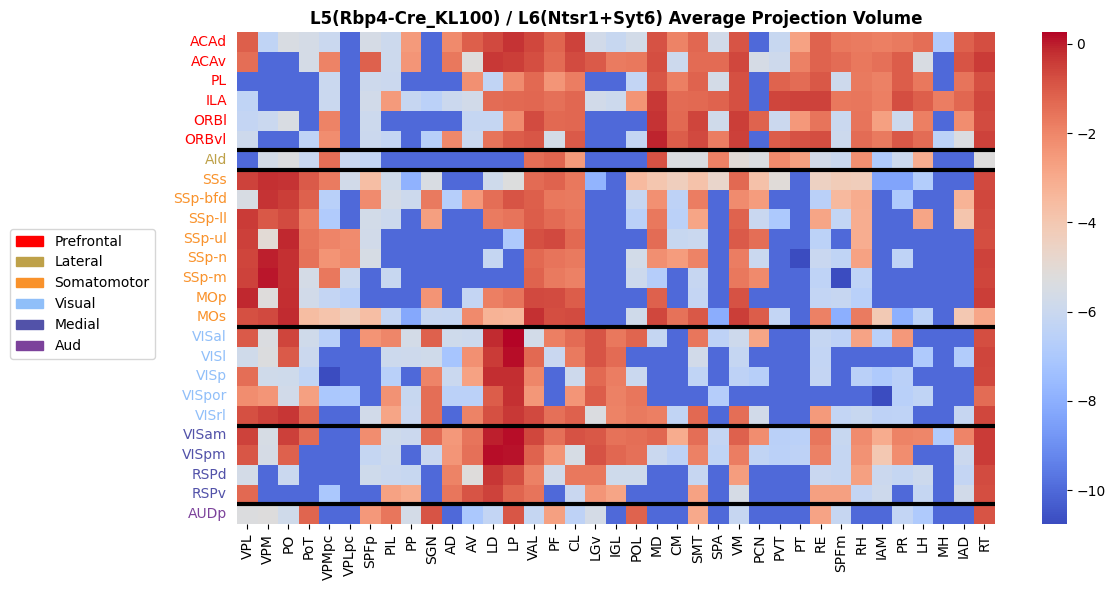

In [266]:
# sns.heatmap((Rbp4_L5+Ntsr1_Syt6_L6)/2)
# Define color mapping
cluster_labels = ['Prefrontal']*6 + ['Lateral']*1 + ['Somatomotor']*8 + ['Visual']*5 + ['Medial']*4 + ['Aud']

cluster_colors = {'Prefrontal': '#ff0000', 'Lateral': '#bea149', 'Somatomotor': '#f9922b', 
                  'Visual': '#90bff9', 'Medial': '#5252a9', 'Aud': '#7c429b'}
# Create Label Color
row_colors = pd.Series(cluster_labels).map(cluster_colors)

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap((Rbp4_L5+Ntsr1_Syt6_L6)/2, cmap='coolwarm', ax=ax, yticklabels=False)
# Add cluster segmentation line
prev_cluster = cluster_labels[0]
for idx, label in enumerate(cluster_labels):
    if label != prev_cluster:
        ax.axhline(idx, color='black', linewidth=3)
        prev_cluster = label
# Add row label color
idx=0
for id, label in zip(Ntsr1_Syt6_L6.index, cluster_labels):
    ax.text(-0.5, idx + 0.5, id, color=cluster_colors[label], va='center', ha='right')
    idx = idx+1
ax.set_ylabel('')
# Add legends
legend_handles = [Patch(color=color, label=cluster) for cluster, color in cluster_colors.items()]
ax.legend(handles=legend_handles, bbox_to_anchor=(-0.3, 0.6), loc='upper left', borderaxespad=0.)
ax.set_title('L5(Rbp4-Cre_KL100) / L6(Ntsr1+Syt6) Average Projection Volume', fontweight='bold')
plt.tight_layout()
# plt.savefig('./L56_mean_conn.pdf', format='pdf')

In [184]:
connect = (Rbp4_L5+Ntsr1_Syt6_L6)/2
connect

,VPL,VPM,PO,PoT,VPMpc,VPLpc,SPFp,PIL,PP,SGN,...,PT,RE,SPFm,RH,IAM,PR,LH,MH,IAD,RT
anchor source,,,,,,,,,,,,,,,,,,,,,
ACAd,-1.090171,-6.342319,-5.426504,-5.605730,-6.008217,-10.000000,-5.566647,-5.895726,-2.527515,-10.000000,...,-2.727347,-1.183582,-1.670217,-1.755893,-1.809540,-1.685012,-1.448781,-6.879172,-1.144436,-0.769605
ACAv,-1.423084,-10.000000,-10.000000,-5.608990,-1.929727,-10.000000,-1.132599,-5.927264,-2.399007,-10.000000,...,-1.873386,-1.182032,-1.403915,-1.655801,-1.468856,-1.057059,-5.430204,-10.000000,-0.900422,-0.413475
PL,-10.000000,-10.000000,-10.000000,-10.000000,-5.992111,-10.000000,-5.882870,-5.961731,-10.000000,-10.000000,...,-1.389215,-0.970923,-5.878069,-1.704030,-1.890465,-1.035770,-1.639700,-10.000000,-1.569406,-0.807789
ILA,-6.325188,-10.000000,-10.000000,-10.000000,-6.017124,-10.000000,-5.751314,-2.520655,-6.144408,-6.509481,...,-0.546665,-0.545810,-1.654686,-1.603711,-1.813752,-0.737798,-1.087582,-1.804623,-1.274479,-0.642914
ORBl,-6.224208,-6.003722,-5.437890,-10.000000,-1.905725,-10.000000,-5.918426,-10.000000,-10.000000,-10.000000,...,-2.467256,-1.554422,-6.000569,-1.589246,-2.697192,-5.901769,-1.834357,-10.000000,-2.160936,-0.693127
ORBvl,-5.882161,-10.000000,-10.000000,-6.375555,-2.185265,-10.000000,-5.950850,-6.211784,-10.000000,-6.643945,...,-0.828830,-0.776871,-5.913809,-1.420968,-1.698088,-0.956903,-1.414943,-6.478384,-5.357311,-0.545583
AId,-10.000000,-5.641845,-5.325552,-6.050576,-1.452111,-6.043647,-6.252712,-10.000000,-10.000000,-10.000000,...,-2.700659,-5.744953,-5.990823,-2.209329,-6.914940,-5.937606,-3.096440,-10.000000,-10.000000,-5.233617
SSs,-0.533973,-0.245893,-0.284354,-1.007490,-1.754370,-5.729620,-3.632334,-5.785201,-7.888268,-5.437407,...,-10.000000,-4.436421,-4.193741,-4.288500,-8.377699,-8.356392,-6.792026,-10.000000,-10.000000,-0.683757
SSp-bfd,-5.483834,-0.286921,-0.440568,-1.150783,-6.616602,-10.000000,-2.125942,-5.626288,-5.918936,-1.722711,...,-10.000000,-6.576067,-3.461558,-3.051209,-10.000000,-6.952895,-10.000000,-10.000000,-3.256035,-0.630895


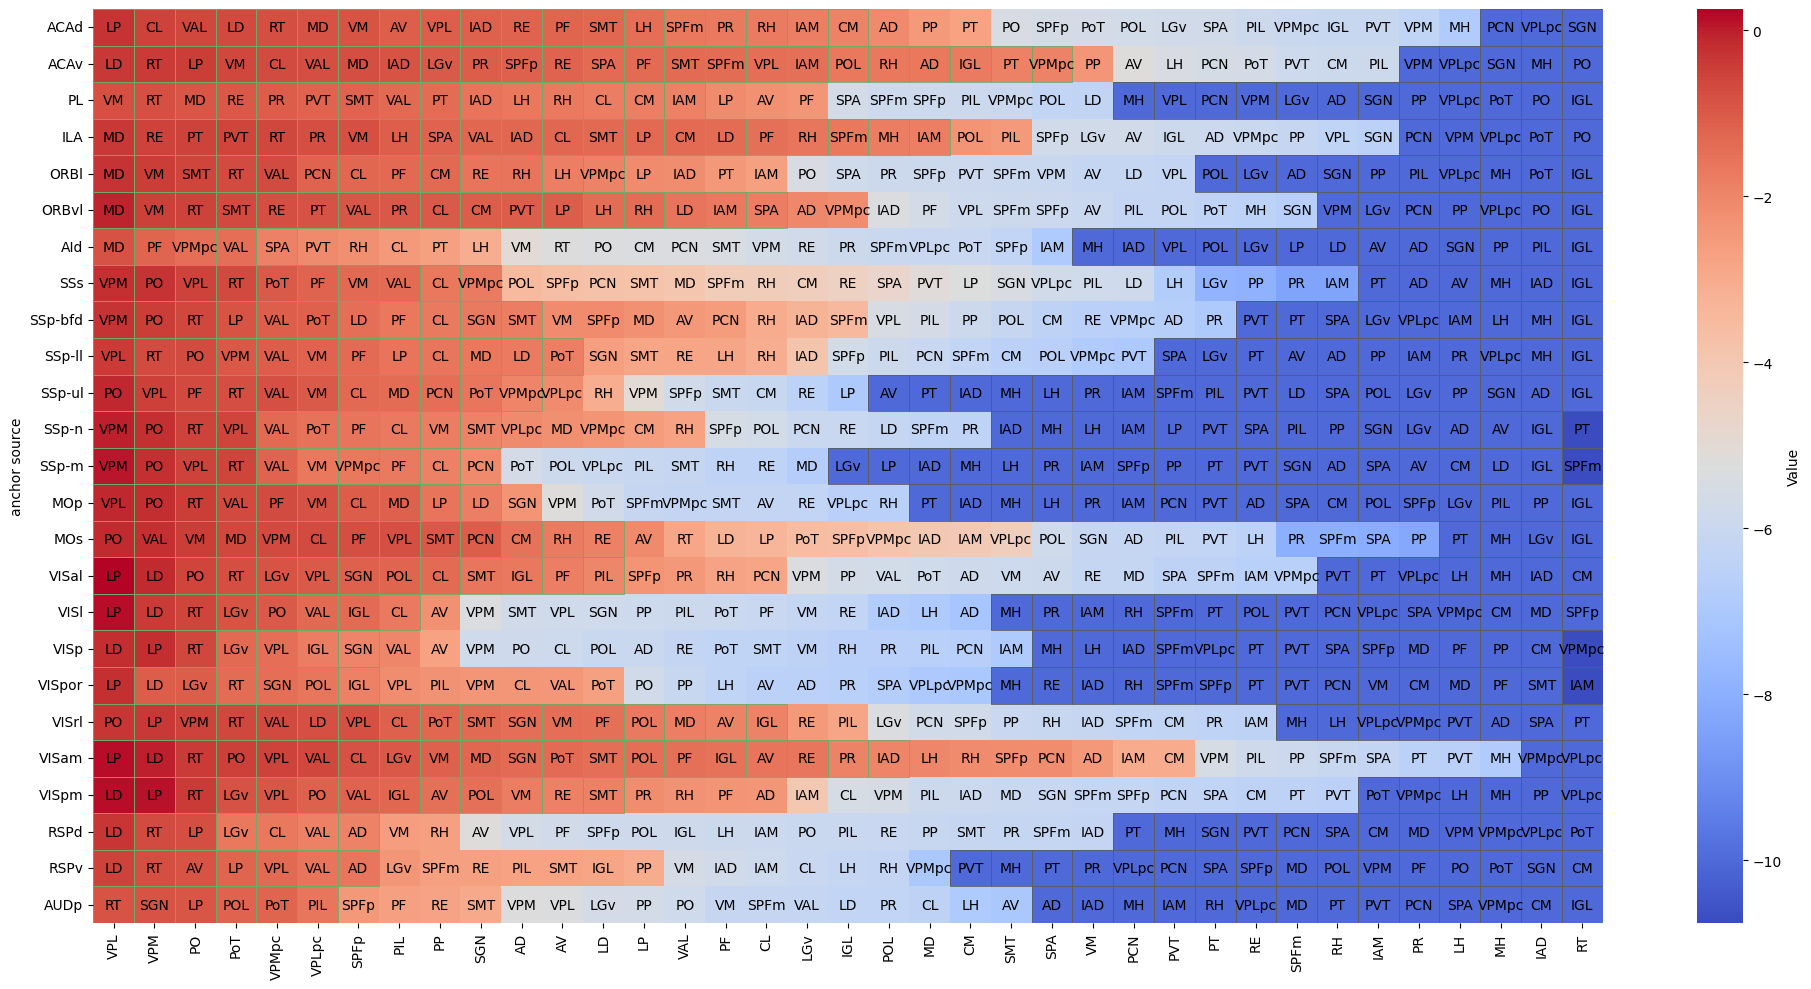

In [206]:
data = connect
# Sort each line and get the name after sorting
sorted_columns = data.apply(lambda x: x.sort_values(ascending=False).index.tolist(), axis=1)

# Create a new DataFrame, which contains sorted data
sorted_data = pd.DataFrame(index=data.index, columns=data.columns)
for i, row in enumerate(sorted_columns):
    sorted_data.iloc[i] = data.loc[data.index[i], row].values

# Make sure all the values ​​in sorted_data are numerical types
sorted_data = sorted_data.astype(float)

# Create a DataFrame with the same shape as sorted data, which is used to store the name
annotation_data = pd.DataFrame(sorted_columns.tolist(), index=data.index, columns=data.columns)

# Draw a hot picture
plt.figure(figsize=(20, 10))
ax = sns.heatmap(sorted_data, annot=annotation_data, fmt='', cmap='coolwarm', cbar_kws={'label': 'Value'}, annot_kws={'color': 'black'})

# Add white border
from matplotlib.patches import Rectangle
for i, row in enumerate(sorted_data.values):
    for j, value in enumerate(row):
        if value > -2 or value <= -10:
            color = '#6bad6b' if value > -2 else '#5d5d5d'
            rect = Rectangle((j, i), 1, 1, fill=False, edgecolor=color, lw=0.6)
            ax.add_patch(rect)

# Adjust the layout
plt.tight_layout()

# plt.savefig('./L56_tp_tn_conn.pdf', format='pdf')

#### gene anasys

##### 25 ctx area

In [62]:
ctx_region_order = ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl', 'AId', 'SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp', 'MOs', 'VISal', 'VISl', 'VISp', 'VISpor', 'VISrl', 'VISam', 'VISpm', 'RSPd', 'RSPv', 'AUDp']

In [ ]:
th_tp = {}
th_tn = {}
for c in ctx_region_order:
    tmp = connect.loc[c]
    th_tp[c] = tmp[tmp>-2].index.tolist()
    th_tn[c] = tmp[tmp==-10].index.tolist()

In [230]:
ctx_gene_exp_list = []
tp_gene_exp_list = []
tn_gene_exp_list = []
gene_dict = {}

for area in tqdm(ctx_region_order):
    adata.obs['deg'] = 'nan'
    adata.obs.loc[adata.obs['region'].str.startswith((area+'5', area+'6')), 'deg'] = area
    adata.obs.loc[adata.obs['region'].isin(th_tp[area]), 'deg'] = 'connected'
    adata.obs.loc[adata.obs['region'].isin(th_tn[area]), 'deg'] = 'unconnected'
    adata_sel = adata[adata.obs['deg'] != 'nan']

    # ctx vs unconnected
    sc.tl.rank_genes_groups(adata_sel, 'deg', groups=[area], reference='unconnected', method='wilcoxon')
    a_vs_c = sc.get.rank_genes_groups_df(adata_sel, group=area)

    # connected vs unconnected
    sc.tl.rank_genes_groups(adata_sel, 'deg', groups=['connected'], reference='unconnected', method='wilcoxon')
    b_vs_c = sc.get.rank_genes_groups_df(adata_sel, group='connected')

    # Find out the gene of the expression closer to ctx in connected
    similar_genes = []
    for gene in b_vs_c['names']:
        if gene in a_vs_c['names'].values:
            a_logfc = a_vs_c[a_vs_c['names'] == gene]['logfoldchanges'].values[0]
            b_logfc = b_vs_c[b_vs_c['names'] == gene]['logfoldchanges'].values[0]
            if np.sign(a_logfc) == np.sign(b_logfc) and a_logfc > 2 and b_logfc > 2:
                similar_genes.append(gene)
    gene_dict[area] = similar_genes
    if len(similar_genes) == 0:
        print(area)
    adata_sel_ctx = adata_sel[adata_sel.obs['deg'] == area]
    adata_sel_tp = adata_sel[adata_sel.obs['deg'] == 'connected']
    adata_sel_tn = adata_sel[adata_sel.obs['deg'] == 'unconnected']

    # Calculate the average expression
    ctx_mean = adata_sel_ctx[:, similar_genes].X.A.mean(axis=0)
    tp_mean = adata_sel_tp[:, similar_genes].X.A.mean(axis=0)
    tn_mean = adata_sel_tn[:, similar_genes].X.A.mean(axis=0)
    
    # Sum of calculations
    total_mean = ctx_mean + tp_mean + tn_mean
    
    # Calculation ratio
    ctx_proportion = ctx_mean / total_mean
    tp_proportion = tp_mean / total_mean
    tn_proportion = tn_mean / total_mean
    
    ctx_gene_exp_list.append(ctx_proportion)
    tp_gene_exp_list.append(tp_proportion)
    tn_gene_exp_list.append(tn_proportion)

100%|██████████| 25/25 [00:35<00:00,  1.42s/it]


In [ ]:
df_tp_vs_tn = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in gene_dict.items()]))
df_tp_vs_tn

In [212]:
def merge_lists(original_list, group_sizes):
    merged_list = []
    start = 0
    for size in group_sizes:
        end = start + size
        group = original_list[start:end]
        if group:
            merged_group = np.concatenate(group, axis=0)
            merged_list.append(merged_group)
        start = end
    return merged_list

# Definition group size
group_sizes = [6, 1, 8, 5, 4, 1]

# Merge list
merged_tn = merge_lists(tn_gene_exp_list, group_sizes)
merged_tp = merge_lists(tp_gene_exp_list, group_sizes)
merged_ctx = merge_lists(ctx_gene_exp_list, group_sizes)
# len(merged_tn)
categories = ['Prefrontal', 'Lateral', 'Somatomotor', 'Visual', 'Medial', 'Aud']
experiments = ['connected', 'unconnected', 'cortex']
experiments_data = [merged_tp, merged_tn, merged_ctx]

data = []
for exp_name, experiment in zip(experiments, experiments_data):
    for category, values in zip(categories, experiment):
        for value in values:
            data.append({
                'Experiment': exp_name,
                'Category': category,
                'Value': value
            })

df = pd.DataFrame(data)

custom_palette = {
    'cortex': '#478ccf',
    'connected': '#6bad6b',
    'unconnected': '#8d8d8d'
}
custom_markers = {
    # 'cortex': 'D',
    'connected': 'o',  
    'unconnected': 's'   
}
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Category', y='Value', hue='Experiment', marker='o', palette=custom_palette, dashes=False, linewidth=0.5, markersize=6)

plt.xlabel('ctx_module')
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(0.3, 1))
plt.tight_layout()

# plt.savefig('./stereo_L56_Moudel_tp_tn_compare_line_gene.pdf', format='pdf')

In [ ]:
ctx_gene_exp_percent = [i.mean() for i in ctx_gene_exp_list]
tp_gene_exp_percent = [i.mean() for i in tp_gene_exp_list]
tn_gene_exp_percent = [i.mean() for i in tn_gene_exp_list]

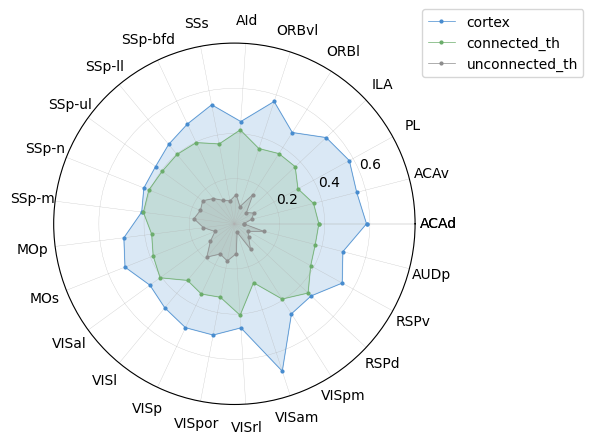

In [232]:
feature = ctx_region_order
value1 = ctx_gene_exp_percent
value2 = tp_gene_exp_percent
value3 = tn_gene_exp_percent

N = len(ctx_gene_exp_list)
# Set the angle of the radar diagram to cut a round surface in a flat separation
angles=np.linspace(0, 2*np.pi, N, endpoint=False)
# In order to close the radar map, the following steps need
value1=np.concatenate((value1,[value1[0]]))
value2=np.concatenate((value2,[value2[0]]))
value3=np.concatenate((value3,[value3[0]]))
angles=np.concatenate((angles,[angles[0]]))
feature = np.concatenate((feature, [feature[0]]))
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
# Draw a line map
ax.plot(angles, value1, 'o-', markersize=2, linewidth=0.5, label = 'cortex', color='#478ccf')
# Fill color
ax.fill(angles, value1, alpha=0.2, color='#478ccf')
# Draw the second folding drawing
ax.plot(angles, value2, 'o-', markersize=2, linewidth=0.5, label = 'connected_th', color='#6bad6b')
ax.fill(angles, value2, alpha=0.2, color='#6bad6b')
# Draw a line map
ax.plot(angles, value3, 'o-', markersize=2, linewidth=0.5, label = 'unconnected_th', color='#8d8d8d')
# Fill color
ax.fill(angles, value3, alpha=0.2, color='#8d8d8d')


# Add the tags of each feature
# ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_thetagrids(angles * 180/np.pi, feature)  # FRAC parameter setting label distance MAX ( *TP, *TN)+0.05 to depart the center
ax.tick_params(axis='x', pad=6)  # Set the distance between the label and the axis
# Set the range of radar chart
# ax.set_ylim(0.25, 0.45)
# Add title
# plt.title(f'Layer5/6_CTX_in & TH_in', fontweight='bold')
# Add grid line
# ax.grid(True)
ax.grid(True, linewidth=0.25, alpha=0.7)

# ax.set_rgrids([0, 0.2, 0.4, 0.6, 0.8], labels=['', '0.2', '0.4', '0.6', ''])
# Set diagram
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# plt.savefig('./stereo_l56_module_ave_exp_radar_plot_gene.pdf', format='pdf')

##### 6 module

In [63]:
ctx_module = {'Prefrontal': ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl'], 'Lateral': ['AId'], 'Somatomotor' :['SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp', 'MOs'],
              'Visual': ['VISal', 'VISl', 'VISp', 'VISpor', 'VISrl'], 'Medial': ['VISam', 'VISpm', 'RSPd', 'RSPv'], 'Aud': ['AUDp']}
th_tp_module = {}
th_tn_module = {}
# Iterate through each context region
for i, c in enumerate(ctx_module.keys()):
    # Create a temporary DataFrame for each region
    if layer == '5':
        tmp = Rbp4_L5.loc[ctx_module[c]].values.flatten()
    elif layer == '6':
        tmp = Ntsr1_Syt6_L6.loc[ctx_module[c]].values.flatten()
    elif layer == '56':
        connect = (Rbp4_L5+Ntsr1_Syt6_L6)/2
        tmp = connect.loc[ctx_module[c]]

    column_means = tmp.mean()
    # Find the index with the largest five columns on average
    top_5_columns = column_means.nlargest(5).index.tolist()
    th_tp_module[c] = top_5_columns

    bottom_5_columns = column_means.nsmallest(5).index.tolist()
    th_tn_module[c] = bottom_5_columns
th_tp_module

{'Prefrontal': ['MD', 'RT', 'VM', 'VAL', 'RE'],
 'Lateral': ['MD', 'PF', 'VPMpc', 'VAL', 'SPA'],
 'Somatomotor': ['PO', 'RT', 'VAL', 'VPL', 'PF'],
 'Visual': ['LP', 'LD', 'RT', 'IGL', 'LGv'],
 'Medial': ['LD', 'LP', 'RT', 'VAL', 'LGv'],
 'Aud': ['RT', 'SGN', 'LP', 'POL', 'PoT']}

In [64]:
module_color={'Prefrontal': '#ff0000',
'Lateral': '#ffff66',
 'Somatomotor': '#f9922b',
 'Visual': '#90bff9',
 'Medial': '#5252a9',
 'Aud': '#7c429b'}

In [71]:
adata.obs['deg'] = 'nan'
area = 'Visual'
area5 = [i+'5' for i in ctx_module[area]]
area6 = [i+'6' for i in ctx_module[area]]
area56 = area5 + area6
adata.obs.loc[adata.obs['region'].str.startswith(tuple(area56)), 'deg'] = area
# adata.obs.loc[adata.obs['region'].str.startswith(tuple(ctx_module[area])), 'deg'] = area
adata.obs.loc[adata.obs['region'].isin(th_tp_module[area]), 'deg'] = 'connected'
adata.obs.loc[adata.obs['region'].isin(th_tn_module[area]), 'deg'] = 'unconnected'
adata.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,deg
cell_label,,,,,,,,,,
207252950882079766503645227815929952400,Zhuang-ABCA-3.023,50.597984,41.393473,12.239274,5.059798,4.139347,1.223927,SSs2/3,01 IT-ET Glut,nan
311894855078226645952213910865897976013,Zhuang-ABCA-3.023,50.420950,41.271525,12.251970,5.042095,4.127152,1.225197,SSs1,01 IT-ET Glut,nan
125208524519663791324346814779771999476,Zhuang-ABCA-3.023,50.959183,43.276307,12.158869,5.095918,4.327631,1.215887,SSs2/3,01 IT-ET Glut,nan
12594778395225515056477813574460470379,Zhuang-ABCA-3.023,49.836112,42.209685,12.238386,4.983611,4.220968,1.223839,SSs1,01 IT-ET Glut,nan
148621603142722639702356861951538418099,Zhuang-ABCA-3.023,51.023440,42.722536,12.174236,5.102344,4.272254,1.217424,SSs2/3,01 IT-ET Glut,nan
...,...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut,nan
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut,nan
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut,nan


In [72]:
adata_sel = adata[adata.obs['deg'] != 'nan']
adata_sel.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,deg
cell_label,,,,,,,,,,
188052700459908704250468015984246340174,Zhuang-ABCA-3.017,78.511319,17.025034,23.450480,7.851132,1.702503,2.345048,VISrl5,01 IT-ET Glut,Visual
244536282695664703731093924351585311804,Zhuang-ABCA-3.017,78.839495,17.453570,23.457475,7.883949,1.745357,2.345747,VISrl5,01 IT-ET Glut,Visual
207737713088111645489974231015219723398,Zhuang-ABCA-3.017,78.672275,18.071984,23.473123,7.867227,1.807198,2.347312,VISrl6a,01 IT-ET Glut,Visual
282030992965481098907637606735824510623,Zhuang-ABCA-3.017,78.575583,19.064710,23.497188,7.857558,1.906471,2.349719,VISal6a,02 NP-CT-L6b Glut,Visual
97661006042925800380741778764498794751,Zhuang-ABCA-3.017,78.796093,19.073735,23.494524,7.879609,1.907373,2.349452,VISal6a,02 NP-CT-L6b Glut,Visual
...,...,...,...,...,...,...,...,...,...,...
156947303650960194776993747274328011056,Zhuang-ABCA-3.009,84.812512,30.863025,37.253313,8.481251,3.086302,3.725331,LP,18 TH Glut,connected
172268668275251998778345610664715788667,Zhuang-ABCA-3.009,84.008563,33.037907,37.280443,8.400856,3.303791,3.728044,LP,18 TH Glut,connected
248145458296088509137955235524055794146,Zhuang-ABCA-3.009,84.917639,32.177712,37.243865,8.491764,3.217771,3.724386,LP,18 TH Glut,connected


In [75]:
sc.tl.rank_genes_groups(adata_sel, 'deg', groups=[area], reference='unconnected', method='wilcoxon')
a_vs_c = sc.get.rank_genes_groups_df(adata_sel, group=area)

sc.tl.rank_genes_groups(adata_sel, 'deg', groups=['connected'], reference='unconnected', method='wilcoxon')
b_vs_c = sc.get.rank_genes_groups_df(adata_sel, group='connected')

In [ ]:
similar_genes = []
for gene in b_vs_c['names']:
    if gene in a_vs_c['names'].values:
        a_logfc = a_vs_c[a_vs_c['names'] == gene]['logfoldchanges'].values[0]
        b_logfc = b_vs_c[b_vs_c['names'] == gene]['logfoldchanges'].values[0]
        # if np.sign(a_logfc) == np.sign(b_logfc) and abs(a_logfc - b_logfc) < 0.4 and a_logfc>2 and b_logfc>2:
        if np.sign(a_logfc) == np.sign(b_logfc) and a_logfc > 2 and b_logfc > 2:
            similar_genes.append(gene)

print(f"similar_genes: {len(similar_genes)}")
print(similar_genes)

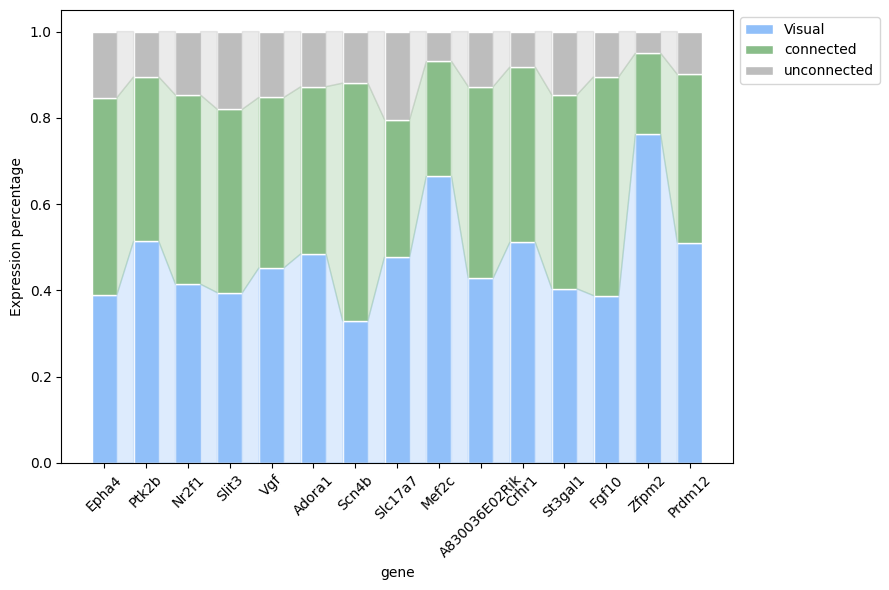

In [80]:
# Set data
df = adata_sel[:, similar_genes].to_df()
df['cluster'] = adata_sel.obs['deg'].values
df_mean = df.groupby('cluster').mean()
# For every column
column_sums = df_mean.sum()
# The value of each column is removed to the corresponding sum
df_percentage = df_mean.div(column_sums)
df_percentage = df_percentage.loc[[area, 'connected', 'unconnected']]

categories = similar_genes
colors = [module_color[area],'#89bd89', '#bdbdbd']
labels = [area, 'connected', 'unconnected']  # Tags corresponding to color
data = df_percentage.values

# Create a chart
fig, ax = plt.subplots(figsize=(9, 6))

# Draw a stack of stacks
x = np.arange(len(categories))
bottom = np.zeros(len(categories))
width=0.6
for i, row in enumerate(data):
    ax.bar(x, row, bottom=bottom, color=colors[i], edgecolor='white',width=width, label=labels[i])
    bottom += row

# Add full -coverage ribbon
for j in range(len(categories) - 1):
    left = x[j]+width/2
    right = x[j+1]-width/2
    left_data = data[:, j]
    right_data = data[:, j+1]
    
    left_cumsum = np.cumsum(left_data)
    right_cumsum = np.cumsum(right_data)
    
    # Add all ribbons from the bottom to the top
    for i in range(len(colors)):
        left_bottom = left_cumsum[i-1] if i > 0 else 0
        left_top = left_cumsum[i]
        right_bottom = right_cumsum[i-1] if i > 0 else 0
        right_top = right_cumsum[i]
        
        ax.fill([left, right, right, left],
                [left_bottom, right_bottom, right_top, left_top],
                color=colors[i], alpha=0.3)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Figure placed on the outside of the upper right corner

# Set chart style
# ax.set_title('Full Coverage Ribbon Stacked Bar Chart')
ax.set_xlabel('gene')
ax.set_ylabel('Expression percentage')
plt.xticks(x, rotation=45)
ax.set_xticklabels(categories)

plt.tight_layout()
# plt.savefig(f'./Supp_fig/tp_tn_gene_deg_{area}.pdf', format='pdf')

In [37]:
gene_path = f'./gene/{area}/'
os.makedirs(gene_path, exist_ok=True)

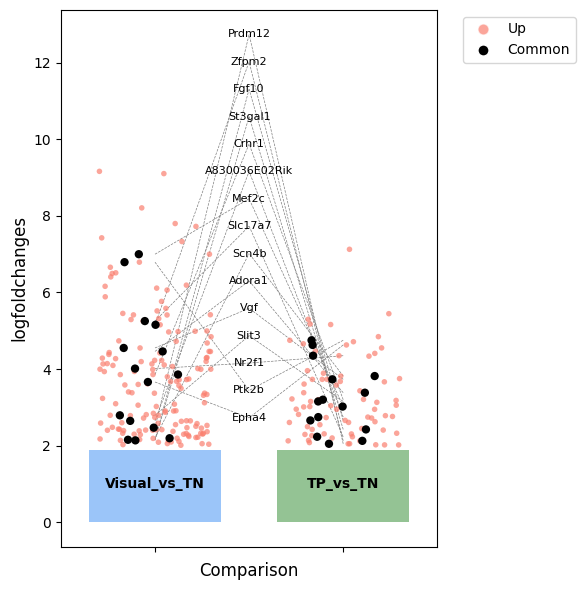

In [82]:
a_vs_c['comparison'] = f'{area}_vs_TN'
b_vs_c['comparison'] = 'TP_vs_TN'
df = pd.concat([a_vs_c, b_vs_c])
df['regulation'] = df['logfoldchanges'].apply(lambda x: 'Up' if x > 0 else 'Down')
df = df[df['logfoldchanges'] > 2]

genes_to_label = similar_genes
comparisons = [f'{area}_vs_TN', 'TP_vs_TN']

# Create graphics and coordinate shafts
fig, ax = plt.subplots(figsize=(6, 6))

# Use Seaborn's Stripplot function
ax = sns.stripplot(x='comparison', y='logfoldchanges', hue='regulation', data=df, 
                   jitter=0.3, size=4, palette={'Up': '#fa7f6f', 'Down': '#82b0d2'}, alpha=0.7, orient='v')
sns.stripplot(x='comparison', y='logfoldchanges', data=df[df['names'].isin(genes_to_label)], 
              jitter=0.2, size=6, color='black', alpha=1, ax=ax, orient='v')

# Add notes and tags
label_x = 0.5  #The X coordinate of the label (in the middle of the two groups of scattered dots)
label_offset = 0.1  # Vertical spacing between labels
max_y = df['logfoldchanges'].max()
min_y = df['logfoldchanges'].min()
label_y_range = max_y - min_y
label_y_start = min_y + label_y_range * 0.1  # Start the label from the position of 10%of the Y axis

for i, gene in enumerate(genes_to_label):
    gene_data = df[df['names'] == gene]
    label_y = label_y_start + i * label_offset * label_y_range
    
    for j, comp in enumerate(comparisons):
        if not gene_data[gene_data['comparison'] == comp].empty:
            x = j
            y = gene_data[gene_data['comparison'] == comp]['logfoldchanges'].values[0]
            ax.plot([x, label_x], [y, label_y], color='gray', linestyle='--', linewidth=0.5)

    ax.text(label_x, label_y, gene, fontsize=8, ha='center', va='center')

# Set diagram
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Up', markersize=8, markerfacecolor='#fa7f6f', alpha=0.7),
    # Line2D([0], [0], marker='o', color='w', label='Down', markersize=8, markerfacecolor='#82b0d2', alpha=0.7),
    Line2D([0], [0], marker='o', color='w', label='Common', markersize=8, markerfacecolor='black', alpha=1)
]
ax.legend(handles=legend_elements, title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.axhline(y=2, color='black', linestyle='--', linewidth=2, alpha=0.7, zorder=11)
# Set the title and label
plt.xlabel('Comparison', fontsize=12)
plt.ylabel('logfoldchanges', fontsize=12)

# Add a box with a comparative name
width = 0.7  # width
height = 1.9  # high
x_offset = -width/2  # Adjust the X offset to maintain the center
y_offset = 0  # Adjust Y offset to keep in the middle
cm=[module_color[area], '#89bd89']
for i, comp in enumerate(comparisons):
    rect = plt.Rectangle((i+x_offset, y_offset), width, height, fill=True, facecolor=cm[i], alpha=0.9, zorder=10)
    ax.add_patch(rect)
    ax.text(i, 1, comp, ha='center', va='center', fontweight='bold', color='black', zorder=11)

# Remove the X -axis tag
ax.set_xticklabels([])

# Adjust the range of the X -axis and leave space for the middle label
plt.xlim(-0.5, len(comparisons) - 0.5)

# 调整图的布局
plt.tight_layout()

# plt.savefig(gene_path + 'tp_tn_gene_deg.pdf', format='pdf')